#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Loading the dataset

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Checking the size of data (rows, cols)

In [4]:
boston_df.shape

(506, 14)

#### Verifying basic information of data

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


#### Verifying if there are any Null values present in the data

In [6]:
boston_df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

#### Verifying if there are any duplicates present in the data

In [7]:
boston_df.duplicated().sum()

0

#### Looking  for number of unique values present over each column

In [8]:
boston_df.nunique()

Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
LSTAT         455
MEDV          229
dtype: int64

#### Looking for the unique values of CHAS & RAD columns

In [9]:
boston_df.CHAS.unique()

array([0., 1.])

In [10]:
boston_df.RAD.unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

#### Basic Statistical observations of each column

In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000



# Task 4: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

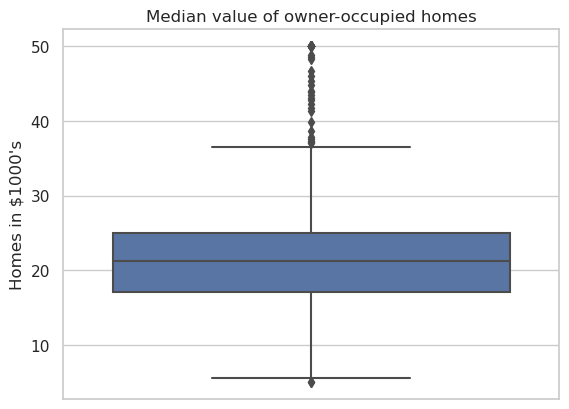

In [12]:
sns.set(style='whitegrid')
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')
plt.ylabel("Homes in $1000's")
plt.show()

With the help of above Box plot, we could see that there are outliers for 'MEDV' variable where one outlier below the lower bound and many outliers above the upper bound.

### Provide a  bar plot for the Charles river variable

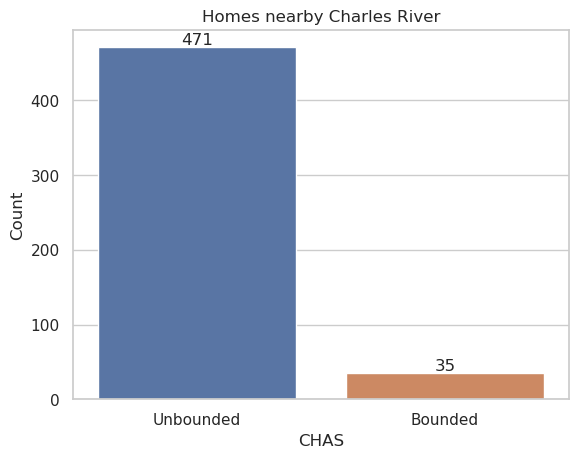

In [13]:
ax = sns.countplot(data=boston_df, x='CHAS')
plt.title('Homes nearby Charles River')
plt.xlabel('CHAS')
plt.ylabel('Count')
ax.set_xticks([0,1])
ax.set_xticklabels(["Unbounded", "Bounded"])
ax.bar_label(ax.containers[0])
plt.show()

By observing the bar plot, we could see that there are only few houses bounded to Charles River

### Provide a boxplot for the MEDV variable vs the AGE variable. 

In [14]:
boston_df.loc[boston_df['AGE']<=35,'age_group']='35 years and below'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group']='Between 35 years and 70 years'
boston_df.loc[boston_df['AGE']>=70,'age_group']='70 years and older'

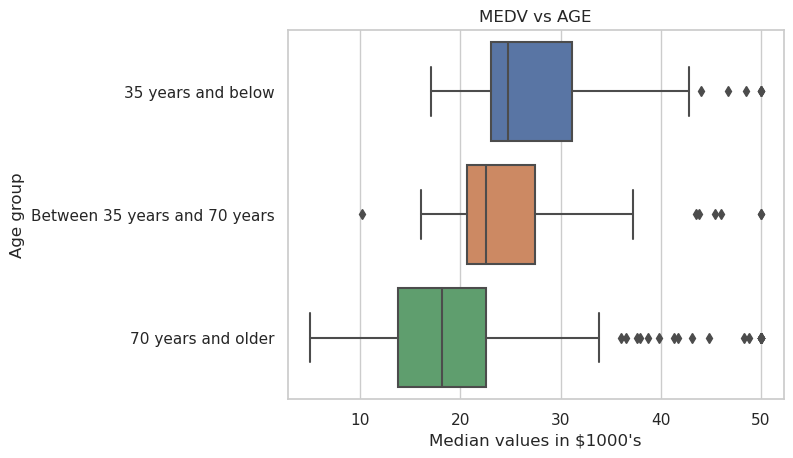

In [15]:
sns.boxplot(y='age_group',x='MEDV', data=boston_df, order=['35 years and below', 'Between 35 years and 70 years','70 years and older'])
plt.title('MEDV vs AGE')
plt.xlabel("Median values in $1000's")
plt.ylabel("Age group")

plt.show()

From the above boxplot, we could see that the lower age group people are having higher median values in $1000's. Also, we can observe that comparatively there many outliers for 70 years and above age group category

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

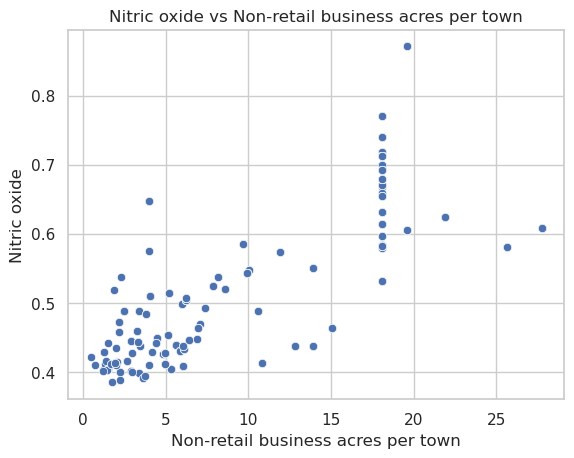

In [16]:
sns.scatterplot(x='INDUS',y='NOX',data=boston_df)
plt.title('Nitric oxide vs Non-retail business acres per town')
plt.xlabel('Non-retail business acres per town')
plt.ylabel('Nitric oxide')
plt.show()

By the above scatter plot, we could see there is a positive correlation between Nitric oxide concentration and the proportion of non-retail business acres per town

### Create a histogram for the pupil to teacher ratio variable

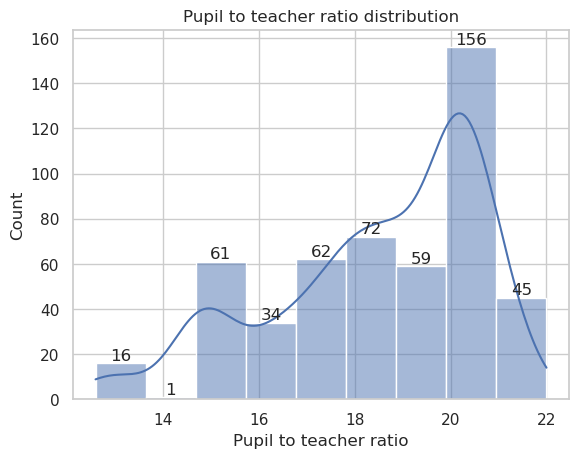

In [17]:
ax=sns.histplot(x='PTRATIO',bins=9,kde=True, data=boston_df)
plt.title('Pupil to teacher ratio distribution')
plt.xlabel('Pupil to teacher ratio')
ax.bar_label(ax.containers[0])
plt.show()

By observing the distribution, we can see that the pupil to teacher ratio is peaked at 20-21 range

# Task 5: Use the appropriate tests to answer the questions provided.

## Is there a significant difference in median value of houses bounded by the Charles river or not? 

We will be using T-test to perform the above analysis, as we have one independent variable with two level of groups(CHAS) and the dependent variable with continous values(MEDV).

### Now, lets check if the dependent variable following a normal distribution

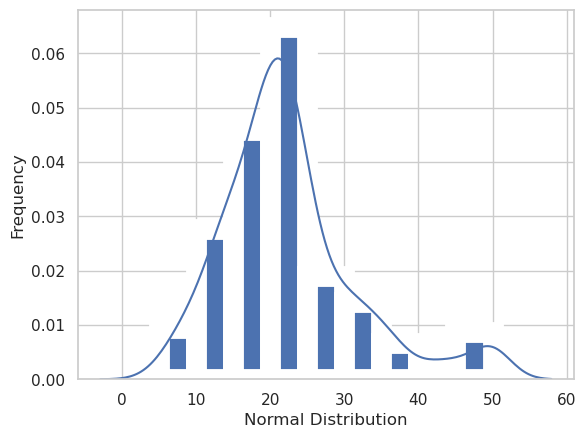

In [18]:
import warnings
warnings.filterwarnings('ignore')
ax = sns.distplot(boston_df['MEDV'],
                  bins=9,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()
## we can assume it is normal

From the above plot, we can assume that dependent variable is following the normal distribution

Let's state the hypothesis

* Null Hypothesis:      There is no significant difference in median value of houses bounded by the Charles river 
* Alternate Hypothesis: There a significant difference in median value of houses bounded by the Charles river 

Let's consider the alpha value: 0.05

#### Let's perform levene test to know whether the variances are equal or not

In [19]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'],center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

We could see the p-value is less than 0.05, hence the variances are not equal

#### Let's perform the T-test by setting the variances are not equal to condition

In [20]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'],equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

We could see the p-value is less than 0.05, hence we can reject the Null hypothesis and conclude that there a significant difference in median value of houses bounded by the Charles river 

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

We will be using ANOVA one way test to perform the above analysis, as we have one independent variable with three level of groups(age_group) and the dependent variable with continous values(MEDV).

Let's state the hypothesis

* Null Hypothesis: The means of all three age groups are equal
* Alternate Hypothesis: At least one of the means differ

Let's consider the Alpha value: 0.05

In [21]:
thirtyfive_lower= boston_df[boston_df['age_group']=='35 years and below']['MEDV']
thirtyfive_seventy= boston_df[boston_df['age_group']=='Between 35 years and 70 years']['MEDV']
seventy_upper= boston_df[boston_df['age_group']=='70 years and older']['MEDV']
f_statistics,p_value = scipy.stats.f_oneway(thirtyfive_lower,thirtyfive_seventy,seventy_upper)
print(f'f_statistics: {f_statistics}, P-Value: {p_value}')

f_statistics: 36.40764999196599, P-Value: 1.7105011022702984e-15


By the above ANOVA one way test, we can observe that the p-value is less than the Alpha value. Hence we can reject the Null Hypothesis and conclude that atleast one of the means differ

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

We can use Pearson corrleation test to perform the analysis, as both variables (NOX & INDUS) are continous

Let's state the hypothesis:
* Null Hypothesis: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
* Alternate Hypothesis: There is correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

Let's consider the aplha value: 0.05

In [22]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

By the above pearson correlation test, we can observe that the p-value is less than the alpha value. Hence rejecting the Null Hypothesis and concluding that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

By looking at the correlation co-effiecient(~0.76), we can say that there is a strong positive correlation between the two variables.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

### Regression Analysis in place of Pearson correlation

Let's state the hypothesis:
* Null Hypothesis: There is no  impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
* Alternate Hypothesis: There is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

Let's consider the aplha value: 0.05

In [23]:
X=boston_df['DIS']
Y=boston_df['MEDV']
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        11:32:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above regression analysis, we can see that the p-value is less than the Alpha value(0.05). Hence we can reject the Null Hypothesis and conclude that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

Also, we can see the R-Squared value is 0.062 which is approximately equal to pearson correlation of 0.249. This indicates there is a mediocre positive correlation between the variables.

The DIS Coefficient value is equal to 1.0916 which indicates that additional weighted distance to the five Boston employment centres creates an increase of 1.0916 to the median value of owner occupied homes.